In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

STEP 1 -  Importing the dataset and reading values

In [2]:
sample1 = pd.read_csv('Titanic-Dataset.csv')

In [3]:
sample1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking null values in the dataset

In [4]:
sample1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Exploring the values in the dataset

In [5]:
sample1.describe()
sample1.info()
sample1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

STEP 2 -Handle missing values using mean/median/imputation.

In [6]:
sample1['Age'] = sample1['Age'].fillna(sample1['Age'].median())
if 'Cabin' in sample1.columns:
    sample1['Cabin'] = sample1['Cabin'].fillna('Unknown')
sample1['Embarked'] = sample1['Embarked'].fillna(sample1['Embarked'].mode()[0])




In [7]:
sample1.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

STEP 3-Convert categorical features into numerical using encoding.

The categorical features in this dataset are Name, Sex, Ticket, Cabin, and Embarked.

In [8]:
# we will be using one-hot encoding for categorical variables
encoded_sample1 = pd.get_dummies(sample1, columns=['Sex', 'Embarked'], drop_first=True)
encoded_sample1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,True,False,True


We will drop passengerId, Name, Ticket, and Cabin columns as they are not relevant for the analysis

In [9]:
encoded_sample1.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1, inplace=True)



In [10]:
encoded_sample1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


STEP 4 - Normalize/standardize the numerical features

In [11]:
from sklearn.preprocessing import StandardScaler
 
# identifying the list of columns to be scaled
numerical_cols = ['Age', 'Fare']

#initializing the StandardScaler
scaler = StandardScaler()

#fitting and transforming the numerical columns

encoded_sample1[numerical_cols] = scaler.fit_transform(encoded_sample1[numerical_cols])

In [12]:
encoded_sample1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,True,False,True
1,1,1,0.663861,1,0,0.786845,False,False,False
2,1,3,-0.258337,0,0,-0.488854,False,False,True
3,1,1,0.433312,1,0,0.420730,False,False,True
4,0,3,0.433312,0,0,-0.486337,True,False,True


STEP 5 - Visualize outliers using boxplots and remove them

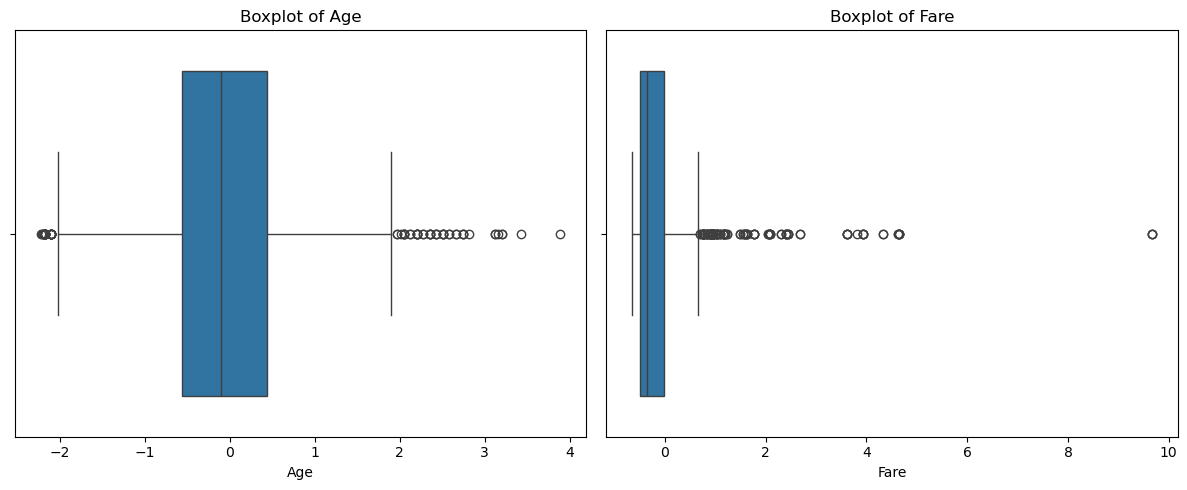

In [13]:
import seaborn as sns
# Assuming your DataFrame is called df
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=encoded_sample1['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=encoded_sample1['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

removing the outliers from the age and fare columns

In [14]:
# Calculate IQR for Age
Q1_age = encoded_sample1['Age'].quantile(0.25)
Q3_age = encoded_sample1['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Calculate IQR for Fare
Q1_fare = encoded_sample1['Fare'].quantile(0.25)
Q3_fare = encoded_sample1['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Filter out outliers
filtered_df = encoded_sample1[
    (encoded_sample1['Age'] >= lower_bound_age) & (encoded_sample1['Age'] <= upper_bound_age) &
    (encoded_sample1['Fare'] >= lower_bound_fare) & (encoded_sample1['Fare'] <= upper_bound_fare)
]


In [15]:
encoded_sample1.shape, filtered_df.shape

((891, 9), (721, 9))

checking the values with the help of a boxplot after removing outliers

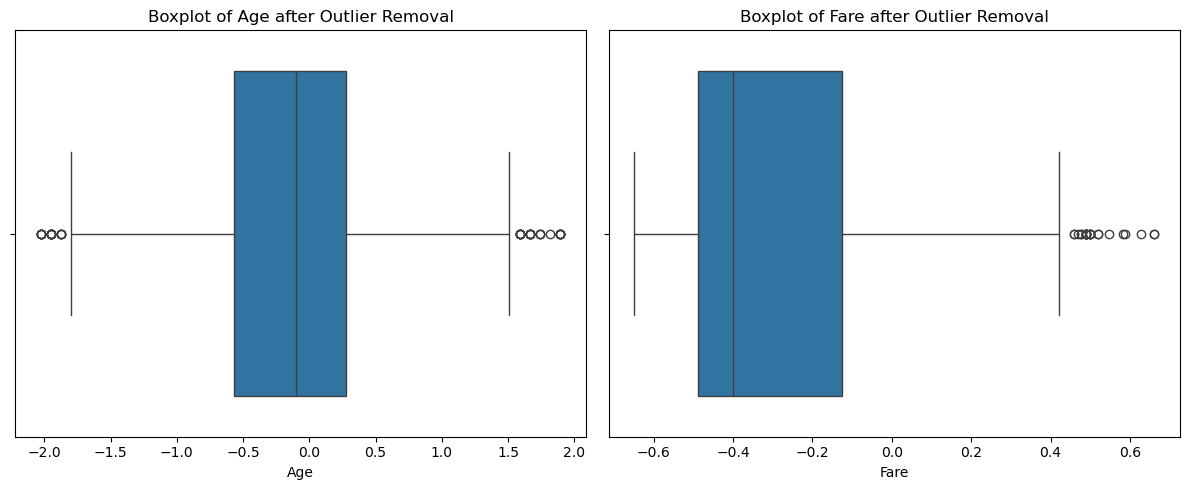

In [16]:
# Assuming your filtered DataFrame after outlier removal is called filtered_df
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_df['Age'])
plt.title('Boxplot of Age after Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['Fare'])
plt.title('Boxplot of Fare after Outlier Removal')

plt.tight_layout()
plt.show()

In [17]:
filtered_df.to_csv('cleaned_titanic_data.csv', index=False)